<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/India_Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 50.6MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
shapefile1 = 'drive/My Drive/Data/India Map/Indian_States.shp'

In [0]:
gdf = gpd.read_file(shapefile1)

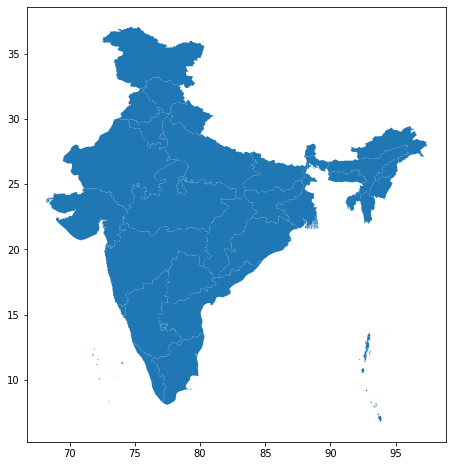

In [5]:
gdf.plot(figsize=(12,8))